<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Titanic_dataset_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
##Titanic dataset

import pandas as pd
import os
import kagglehub

# 1. Descargamos (o localizamos) la ruta otra vez para estar seguros
path = kagglehub.dataset_download("heptapod/titanic")

# 2. Listamos TODOS los archivos que hay en esa carpeta
archivos = os.listdir(path)
print("Archivos encontrados en la carpeta:", archivos)

# 3. Buscamos el primer archivo que termine en .csv
csv_file = [f for f in archivos if f.endswith('.csv')][0]
full_path = os.path.join(path, csv_file)

# 4. Cargamos y mostramos
df = pd.read_csv(full_path)
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [8]:
#Eliminacion de columnas innecesarias
# Creamos una lista con las columnas que SÍ nos interesan
columnas_utiles = ['Passengerid', 'Age', 'Fare', 'Sex', 'Pclass', '2urvived']

# Filtramos el dataframe
df_limpio = df[columnas_utiles]

# Vemos cómo quedó
df_limpio.head()


,Passengerid,Age,Fare,Sex,Pclass,2urvived
0,1,22.0,7.2500,0,3,0
1,2,38.0,71.2833,1,1,1
2,3,26.0,7.9250,1,3,1
3,4,35.0,53.1000,1,1,1
4,5,35.0,8.0500,0,3,0


In [9]:
#¿Quien sobrevivio mas?
# Esto nos dice el promedio de supervivencia por género
# Si el número es cercano a 1, sobrevivieron casi todos. Si es cercano a 0, casi ninguno.
print(df.groupby('Sex')['2urvived'].mean())

Sex
0    0.1293
1    0.5000
Name: 2urvived, dtype: float64


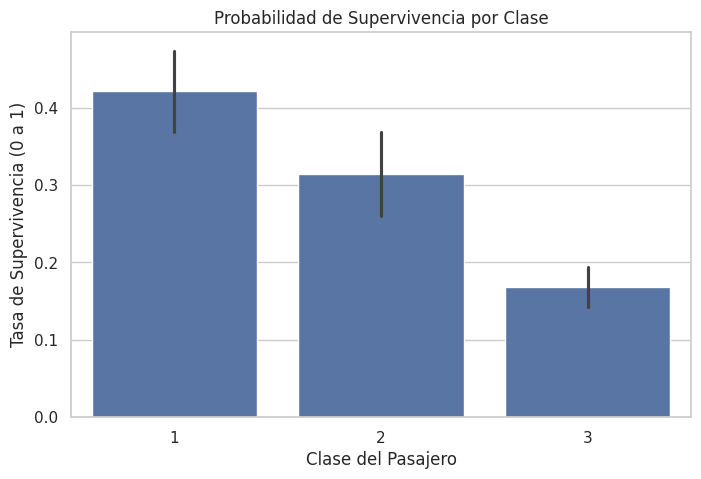

In [10]:
##Grafico 1
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo
sns.set_theme(style="whitegrid")

# Creamos un gráfico de barras que compare la Clase con la Supervivencia
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='2urvived', data=df)

# Añadimos títulos
plt.title('Probabilidad de Supervivencia por Clase')
plt.ylabel('Tasa de Supervivencia (0 a 1)')
plt.xlabel('Clase del Pasajero')

plt.show()

In [14]:
## Imputacion de datos
# 1. Primero vemos cuántos nulos hay en cada columna
print("Datos faltantes antes:")
print(df_limpio.isnull().sum())

# 2. Calculamos la mediana de la edad
mediana_edad = df_limpio['Age'].median()
print(f"\nLa mediana de edad es: {mediana_edad}")

# 3. Rellenamos los huecos (inplace=True para aplicar el cambio)
df_limpio['Age'] = df_limpio['Age'].fillna(mediana_edad)

# 4. Verificamos que ya no haya nulos
print("\nDatos faltantes después:")
print(df_limpio.isnull().sum())



Datos faltantes después:
Passengerid    0
Age            0
Fare           0
Sex            0
Pclass         0
2urvived       0
dtype: int64


In [23]:
## Vamos a crear un modelo que "aprenda" de los datos del pasado (los pasajeros que ya sabemos si sobrevivieron) para que pueda predecir el destino de un pasajero nuevo.
## usando randon forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Definimos 'X' (las características que usará la IA) e 'y' (lo que queremos predecir)
X = df_limpio[['Age', 'Fare', 'Sex', 'Pclass']]
y = df_limpio['2urvived']

# 2. Dividimos los datos: 80% para entrenar y 20% para evaluar si la IA aprendió bien
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Creamos el modelo (el "cerebro" de la IA)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# 4. Entrenamiento: La IA estudia los datos
modelo.fit(X_train, y_train)

# 5. Predicción: Le pedimos que adivine los resultados del 20% que guardamos
predicciones = modelo.predict(X_test)

# 6. Evaluación: ¿Qué tan precisa es nuestra IA?
precision = accuracy_score(y_test, predicciones)
print(f"La precisión de tu IA es del: {precision * 100:.2f}%")

La precisión de tu IA es del: 75.95%


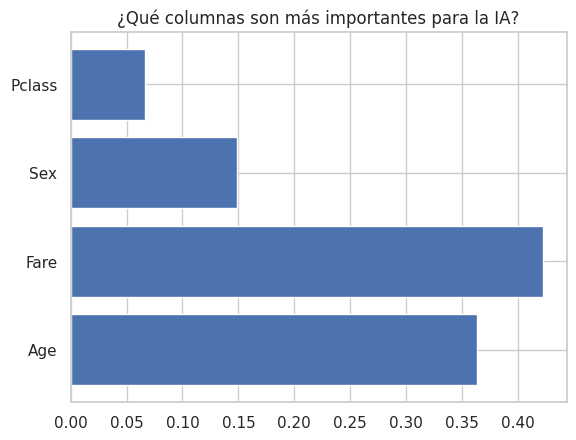

In [24]:
## Diagnostico del modelo

## matriz de confusión
import matplotlib.pyplot as plt

# Extraemos la importancia de cada columna
importancias = modelo.feature_importances_
columnas = X.columns

# Graficamos
plt.barh(columnas, importancias)
plt.title("¿Qué columnas son más importantes para la IA?")
plt.show()

In [28]:
## mejora del modelo
## feature engineering
## categorización de edades para este dataset Titanic
# 1. Creamos la nueva columna: 1 si es menor de 16 años, 0 si no lo es
df_limpio['IsChild'] = (df_limpio['Age'] < 16).astype(int)

# 2. Actualizamos nuestra lista de características (X) incluyendo 'IsChild'
X = df_limpio[['Age', 'Fare', 'Sex', 'Pclass', 'IsChild']]
y = df_limpio['2urvived']

# 3. Volvemos a dividir y entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo_mejorado = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_mejorado.fit(X_train, y_train)

# 4. Evaluamos el nuevo resultado
precision_nueva = accuracy_score(y_test, modelo_mejorado.predict(X_test))
print(f"Nueva precisión: {precision_nueva * 100:.2f}%")

## Conclusiones: no ha mejorado el modelo

Nueva precisión: 74.05%


In [35]:
## Ajuste de hiperparametros
from sklearn.model_selection import GridSearchCV

# 1. Definimos los parámetros que queremos probar
parametros = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 2. Creamos el buscador
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=parametros,
                           cv=5, n_jobs=-1, verbose=1)

# 3. Entrenamos el buscador con los datos originales (sin la columna IsChild que nos bajó la precisión)
X_original = df_limpio[['Age', 'Fare', 'Sex', 'Pclass']]
grid_search.fit(X_train.drop(columns=['IsChild']), y_train)

# 4. Vemos cuál fue la mejor combinación y su precisión
print(f"Mejores parámetros: {grid_search.best_params_}")
mejor_modelo = grid_search.best_estimator_
predicciones_optimas = mejor_modelo.predict(X_test.drop(columns=['IsChild']))
print(f"Precisión optimizada: {accuracy_score(y_test, predicciones_optimas) * 100:.2f}%")


Mejores parámetros: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}
Precisión optimizada: 79.01%


<Figure size 600x600 with 0 Axes>

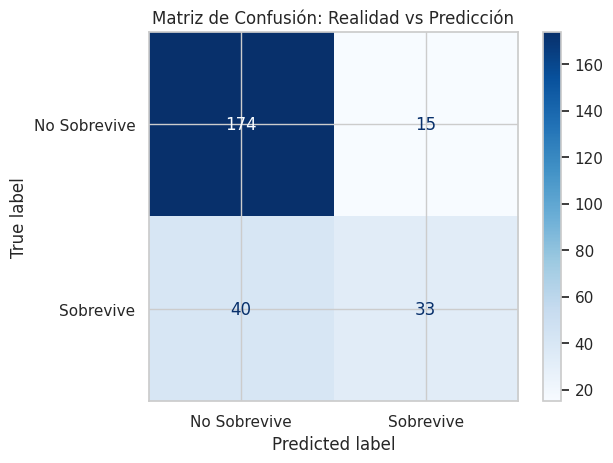

In [37]:
## matriz de confusion: optimista / pesimista?
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generamos la matriz comparando la realidad (y_test) con lo que predijo la IA
matriz = confusion_matrix(y_test, predicciones_optimas)

# La graficamos para que sea fácil de leer
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No Sobrevive', 'Sobrevive'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión: Realidad vs Predicción")
plt.show()

In [38]:
## guardar el modelo
import joblib

# Guardamos el modelo en un archivo llamado 'modelo_titanic.pkl'
joblib.dump(mejor_modelo, 'modelo_titanic.pkl')

print("¡Modelo guardado con éxito!")

¡Modelo guardado con éxito!


In [46]:
## aplicacion del modelo
import joblib
import pandas as pd

# 1. Cargamos el modelo que guardaste antes
modelo_cargado = joblib.load('modelo_titanic.pkl')

def predecir_supervivencia(edad, tarifa, sexo, clase):
    # Todo esto lleva sangría porque está DENTRO de la función
    datos = pd.DataFrame([[edad, tarifa, sexo, clase]],
                         columns=['Age', 'Fare', 'Sex', 'Pclass'])

    pred = modelo_cargado.predict(datos)[0]
    prob = modelo_cargado.predict_proba(datos)[0][1]

    # Estas líneas también deben estar indentadas
    if pred == 1:
        print(f"✅ ¡Sobrevivirías! (Probabilidad: {prob*100:.2f}%)")
    else:
        print(f"❌ Probablemente no sobrevivirías (Probabilidad de éxito: {prob*100:.2f}%)")

# Esto va al borde izquierdo porque ya es para EJECUTAR la función
predecir_supervivencia(edad=25, tarifa=80, sexo=1, clase=1)

# --- PRUEBA AQUÍ TUS DATOS ---
# Ejemplo: 25 años, pagó 80$, es Mujer (1), en 1ª Clase (1)
predecir_supervivencia(edad=25, tarifa=80, sexo=1, clase=1)

✅ ¡Sobrevivirías! (Probabilidad: 72.62%)
✅ ¡Sobrevivirías! (Probabilidad: 72.62%)


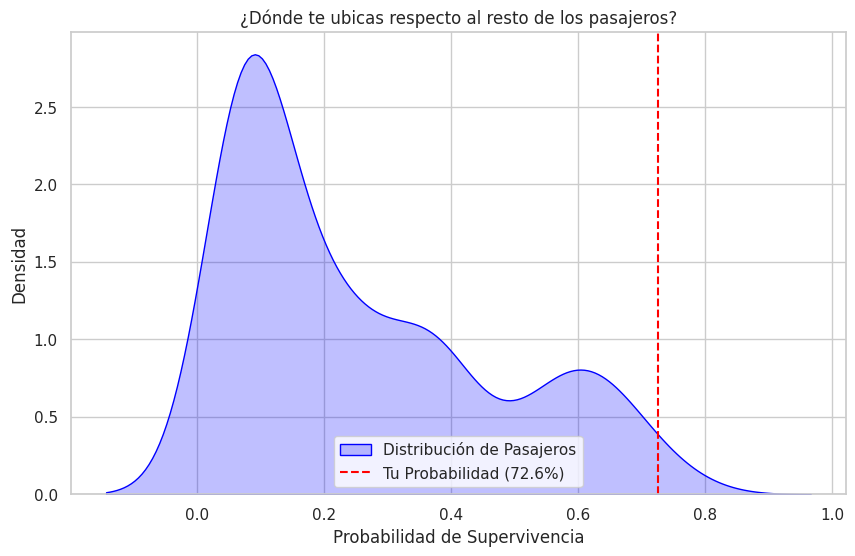

In [47]:
## analisis comparativo
import seaborn as sns

# 1. Obtenemos las probabilidades de todos los pasajeros del test
todas_probs = mejor_modelo.predict_proba(X_test.drop(columns=['IsChild']))[:, 1]

# 2. Tu probabilidad actual (usando los datos del ejemplo)
tu_prob = 0.7262 #viene del resultado anterior

# 3. Graficamos
plt.figure(figsize=(10, 6))
sns.kdeplot(todas_probs, fill=True, color="blue", label="Distribución de Pasajeros")
plt.axvline(tu_prob, color="red", linestyle="--", label=f"Tu Probabilidad ({tu_prob*100:.1f}%)")

plt.title("¿Dónde te ubicas respecto al resto de los pasajeros?")
plt.xlabel("Probabilidad de Supervivencia")
plt.ylabel("Densidad")
plt.legend()
plt.show()